In [65]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random
import numpy as np


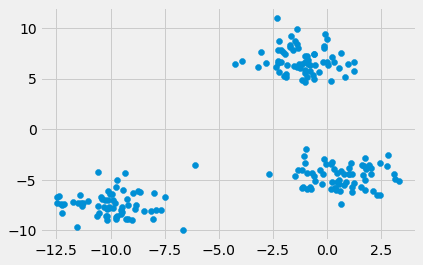

In [66]:
X, y = make_blobs(n_samples=200, random_state=100, n_features=2, centers = 3, cluster_std = 1.2)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

Zadanie1: Zaimplementuj algorytm grupowania górskiego Zastosuj do poniższych danych.

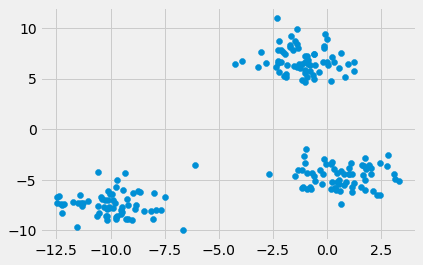

In [67]:
X, y = make_blobs(n_samples=200, random_state=100, n_features=2, centers = 3, cluster_std = 1.2)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

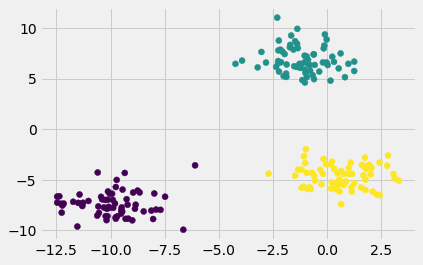

In [68]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X);
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

Idea grupowania górskiego

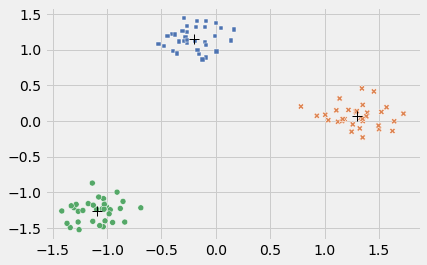

In [69]:
#źródło "towards data science" -> nie mogłam znaleźć linku, bo tyle tego otworzyłam 


data = make_blobs(n_samples=200, random_state=100, n_features=2, centers = 3, cluster_std = 1.2)

def euclidean(point, data):
 #Odległość euklidesowa między punktem a danymi.Punkt ma wymiary (m,), dane mają wymiary (n,m), 
 #a dane wyjściowe będą miały rozmiar (n,).
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KMeans:
    def __init__(self, n_clusters=3, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X_train):
        # używając metody "k-means++" - wybierany jest losowy punkt danych,
        # wtedy reszta jest inicjowana z prawdopodobieństwami proporcjonalnymi do ich odległości od pierwszego
        # Wybierz losowy punkt z danych - centrum
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Odległość od centrów
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            
            dists /= np.sum(dists)
            # Wybranie pozostałych punktów na podstawie ich odległości
            
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        #iteracja
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # najbliższe centrum
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Przesunięcie bieżących centroidów do poprzednich, ponowne przypisanie 
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # wyłapanie centrów nieposiadających punktów
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs
# 2D
centers = 3
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# dopasowanie do datasetu
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)
# wyniki
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.show()

#komentarz - kiedy w KMeans - clusters = centers do dopasowuje się jak poniżej, natomiast jeśli robię to samo 
#tylko z danymi powyżej to oddala mi się cały zestaw i centra oznacza w innych miejscach

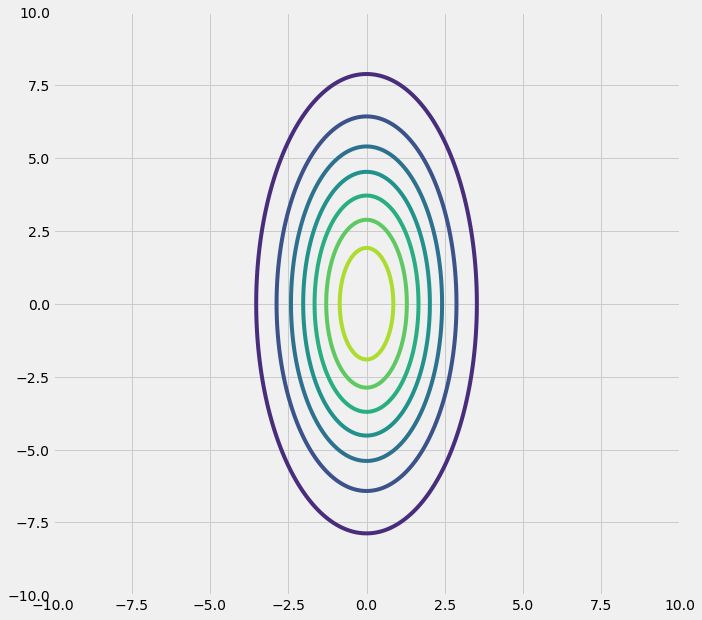

In [70]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import multivariate_normal


#jeszcze znalazłam coś takiego  -> ten przykład poniżej i następny oraz coś z tej strony (3 komórka)

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X,Y = np.meshgrid(x,y)

pos = np.array([X.flatten(),Y.flatten()]).T



rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])


fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.contour(X, Y, rv.pdf(pos).reshape(500,500))

plt.show()

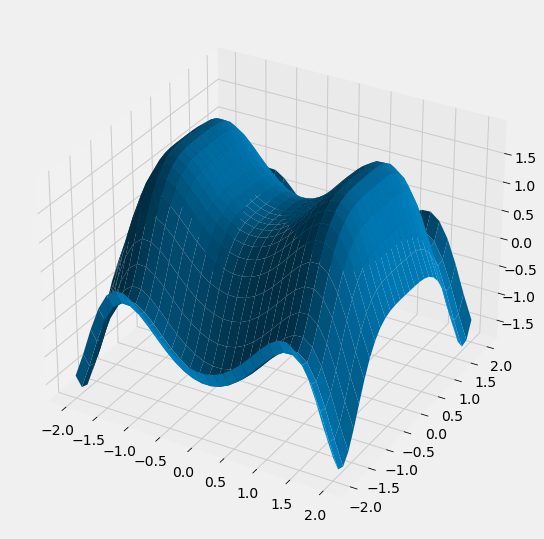

In [71]:

#dane w funkcji gęstosci

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T # transpose
z = (np.sin(x **2) + np.cos(y **2) )
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z)
 
# show plot
plt.show()

Zadanie2: Zaimplementuj algorytm Gustafsona-Kessela. Zastosuj go do poniższych danych - algorytm powinien sobie poradzić z poprawną klasyfikacją.

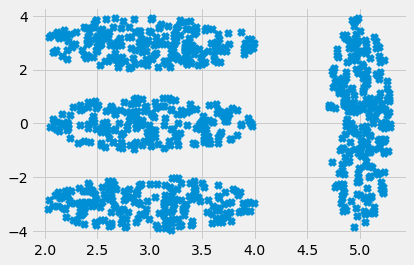

In [72]:
n = 10000
x = np.random.uniform(-6, 6, n)
y = np.random.uniform(-6, 6, n)

x1 = []
y1 = []
for i in range(n):
    if ((x[i]-5)**2)/0.3**2+((y[i]-0)**2)/4**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-3)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-0)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]+3)**2)/1**2 <=1:
        x1.append(x[i])
        y1.append(y[i])
X = np.array([[x,y] for (x,y) in zip(x1,y1)])

plt.scatter(X[:,0],X[:,1], marker = "x")
plt.show()

In [73]:
# źródło: https://www.youtube.com/watch?v=qeTHTOrH46o&ab_channel=wiqaaas

class Fuzzy_Clustering:
    def __init__(self, n_clusters=2, max_iter=150, fuzzines=2, error=1e-5, random_state=42, dist="euclidean", method="Cmeans"):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.fuzzines = fuzzines
        self.error = error
        self.random_state = random_state
        self.dist = dist
        self.method = method
        
    def fit(self, X):
        memberships = self._init_mem(X)
              
        iteration = 0
        while iteration < self.max_iter:
            membershipsNew = deepcopy(memberships)
            new_class_centers = self._update_centers(X, memberships)
            distance = self._calculate_dist(X,memberships,new_class_centers)
            memberships = self._update_memberships(X, memberships, new_class_centers, distance)
            iteration += 1
            if norm(memberships - membershipsNew) < self.error:
                break
            
        return memberships, new_class_centers
    
    def _init_mem(self,X):
        n_samples = X.shape[0]
        n_clusters = self.n_clusters

        #initialize memberships
        rnd = np.random.RandomState(self.random_state)
        memberships = rnd.rand(n_samples,n_clusters)

        #update membership relative to classes
        summation = memberships.sum(axis=1).reshape(-1,1)
        denominator = np.repeat(summation,n_clusters,axis=1)
        memberships = memberships/denominator
        
        return memberships

    def _update_centers(self, X, memberships):
        fuzzyMem = memberships ** self.fuzzines
        new_class_centers = (np.dot(X.T,fuzzyMem)/np.sum(fuzzyMem,axis=0)).T
        return new_class_centers
    
    def _calculate_fuzzyCov(self,X,memberships,new_class_centers):
        #calculating covariance matrix in its fuzzy form  
        fuzzyMem = memberships ** self.fuzzines
        n_clusters = self.n_clusters
        FcovInv_Class = []
        dim = X.shape[1]
        for i in range(n_clusters): 
            diff = X-new_class_centers[i]
            left = np.dot((fuzzyMem[:,i].reshape(-1,1)*diff).T,diff)/np.sum(fuzzyMem[:,i],axis=0)
            Fcov = (np.linalg.det(left)**(-1/dim))*left
            FcovInv = np.linalg.inv(Fcov)
            FcovInv_Class.append(FcovInv)
        return FcovInv_Class

    def _calculate_dist(self,X,memberships,new_class_centers):
        
        if self.method == "Gustafson–Kessel":
            n_clusters = self.n_clusters
            FcovInv_Class = self._calculate_fuzzyCov(X,memberships,new_class_centers)

            #calculating mahalanobis distance
            mahalanobis_Class = []
            for i in range(n_clusters): 
                diff = X-new_class_centers[i]
                left = np.dot(diff,FcovInv_Class[i])    
                mahalanobis = np.diag(np.dot(left,diff.T))
                mahalanobis_Class.append(mahalanobis)
            distance = np.array(mahalanobis_Class).T
            return distance
        
        elif self.method == "Cmeans":
            distance = cdist(X, new_class_centers,metric=self.dist)
            return distance

    def _update_memberships(self, X, memberships, new_class_centers, distance):
        fuzziness = self.fuzzines
        n_clusters = self.n_clusters
        n_samples = X.shape[0]
        
        power = float(2/(fuzziness - 1))
        distance = distance**power
        arr = np.zeros((n_samples,n_clusters))
        for i in range(n_clusters):
            for ii in range(n_clusters):
                arr[:,ii] = ((distance[:,i]/distance[:,ii]))
            memberships[:,i] = 1/np.sum(arr,axis=1)   
        return memberships

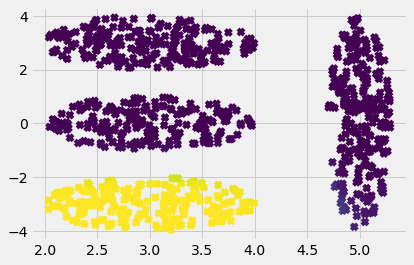

In [74]:
Fclustering = Fuzzy_Clustering(method="Gustafson–Kessel",n_clusters = 4)
memberships, classCenters = Fclustering.fit(X)
fig = plt.subplots()
plt.scatter(X[:,0], X[:,1], c=memberships[:,0], marker = "x")
